In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_a = pd.read_csv("matches_data.csv", sep=',');

In [3]:
data_a

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_id         756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
data_b = pd.read_csv("deliveries_data.csv", sep=',');

In [18]:
data_b

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
season_data=data_a[['match_id','season','winner']]

In [8]:
complete_data=data_b.merge(season_data,how='inner',left_on='match_id',right_on='match_id')

In [9]:
data_a.columns.values

array(['match_id', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'], dtype=object)

In [10]:
data_a=data_a.drop(columns=["umpire3"],axis=1)

In [11]:
data_a.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [15]:
data_a.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [16]:
data_a.rename(columns ={'season':'Year'}, inplace=True)

In [17]:
data_a.columns

Index(['match_id', 'Year', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [18]:
wins_per_season = data_a.groupby("Year")["winner"].value_counts()
wins_per_season

Year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Daredevils                7
      Mumbai Indians                  7
                                     ..
2019  Kings XI Punjab                 6
      Kolkata Knight Riders           6
      Sunrisers Hyderabad             6
      Rajasthan Royals                5
      Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

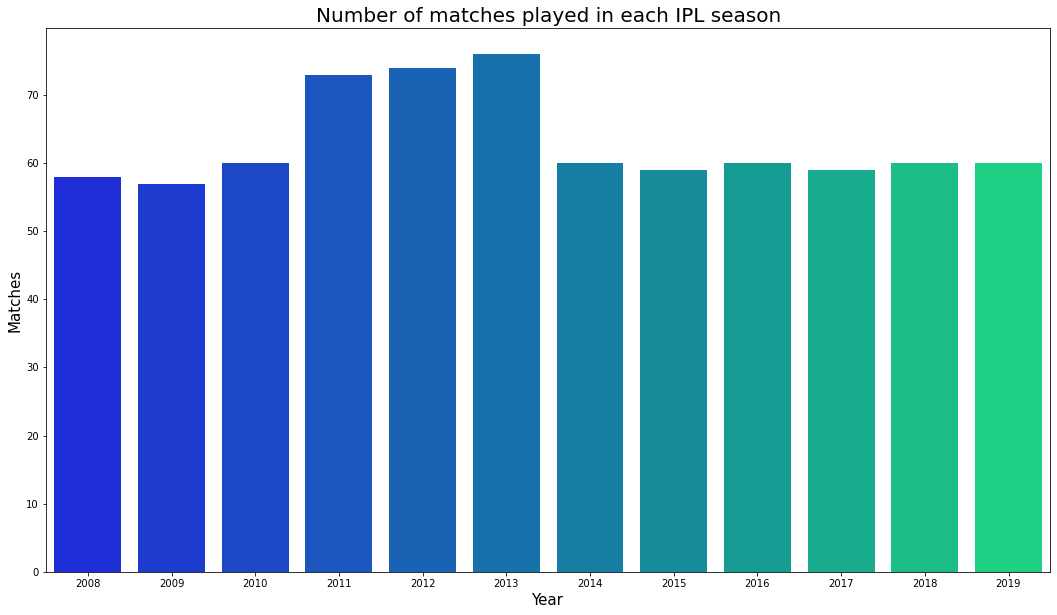

In [21]:
plt.figure(figsize=(18,10))
sns.countplot('Year',data=data_a,palette="winter")
plt.title("Number of matches played in each IPL season",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Matches",fontsize=15)
plt.show()

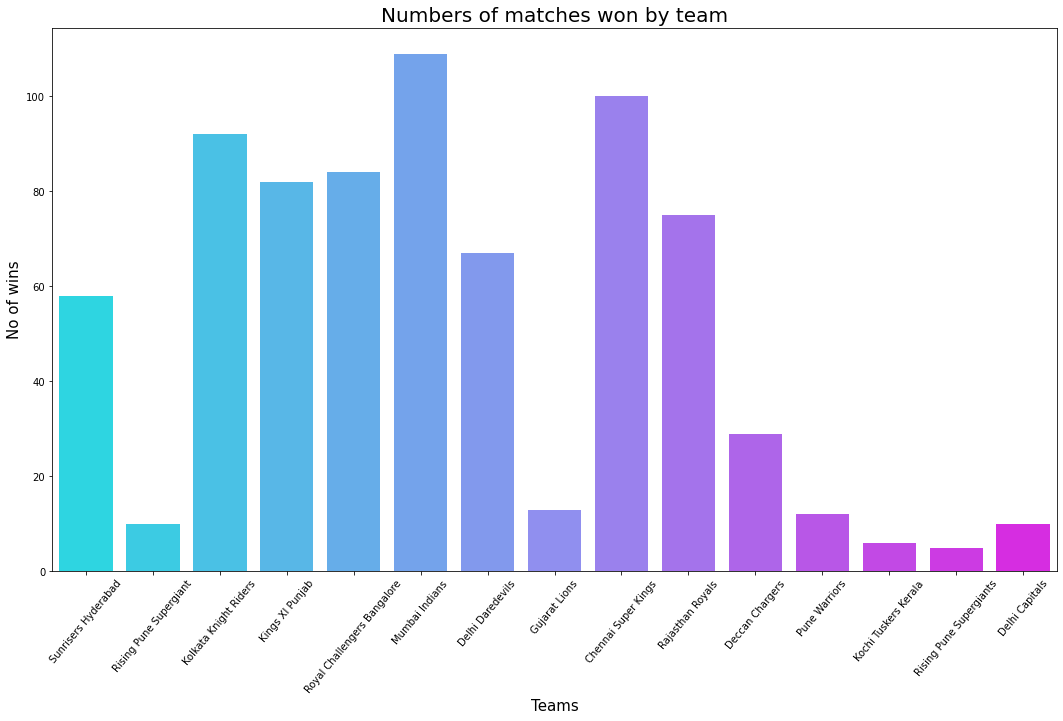

In [22]:
plt.figure(figsize =(18,10))
sns.countplot(x='winner',data=data_a,palette='cool')
plt.title("Numbers of matches won by team",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

## Match Results

In [24]:
data_a['win_by']=np.where(data_a['win_by_runs']>0,'Bat First','Bowl First')

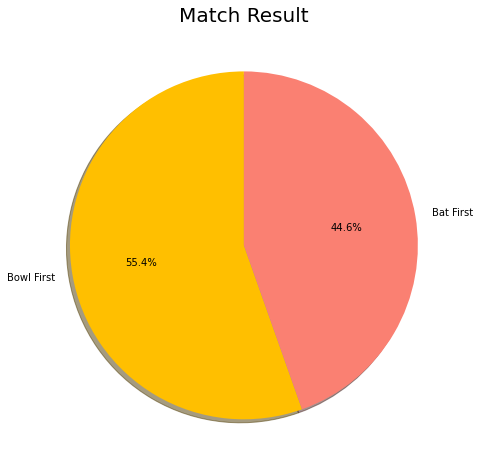

In [31]:
Win=data_a.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.show()

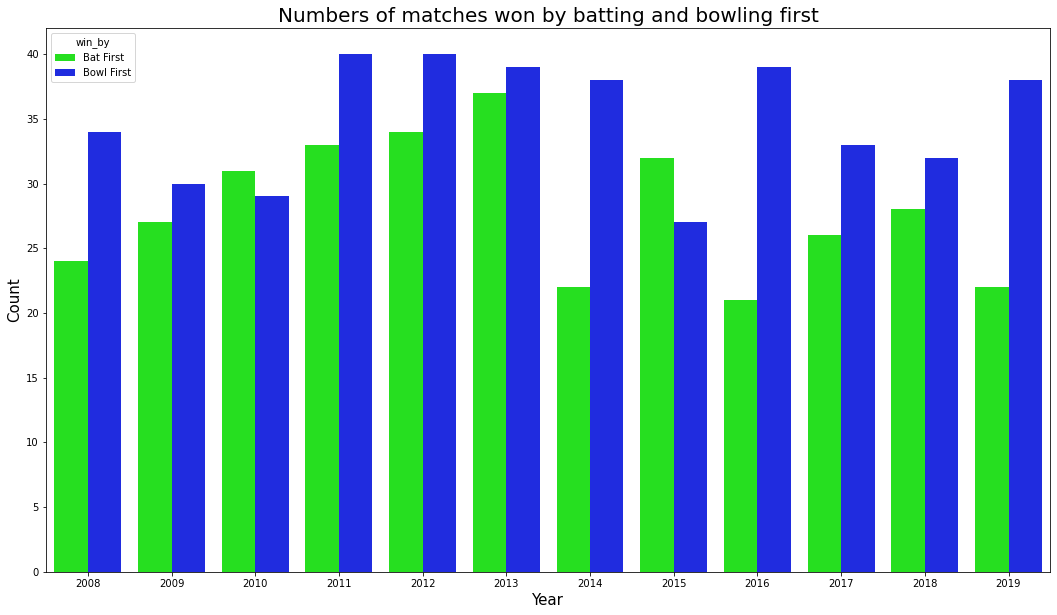

In [32]:
plt.figure(figsize=(18,10))
sns.countplot('Year',hue='win_by',data=data_a,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

## Pie chart on Toss Decision

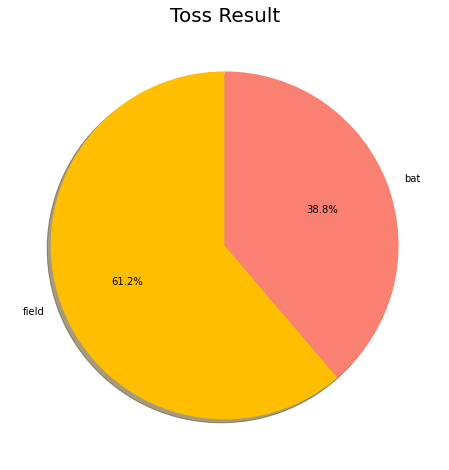

In [34]:
Toss=data_a.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes= Toss.values
colors= ['#FFBF00','#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.show()

## Graph on Number of matches won by Toss Result

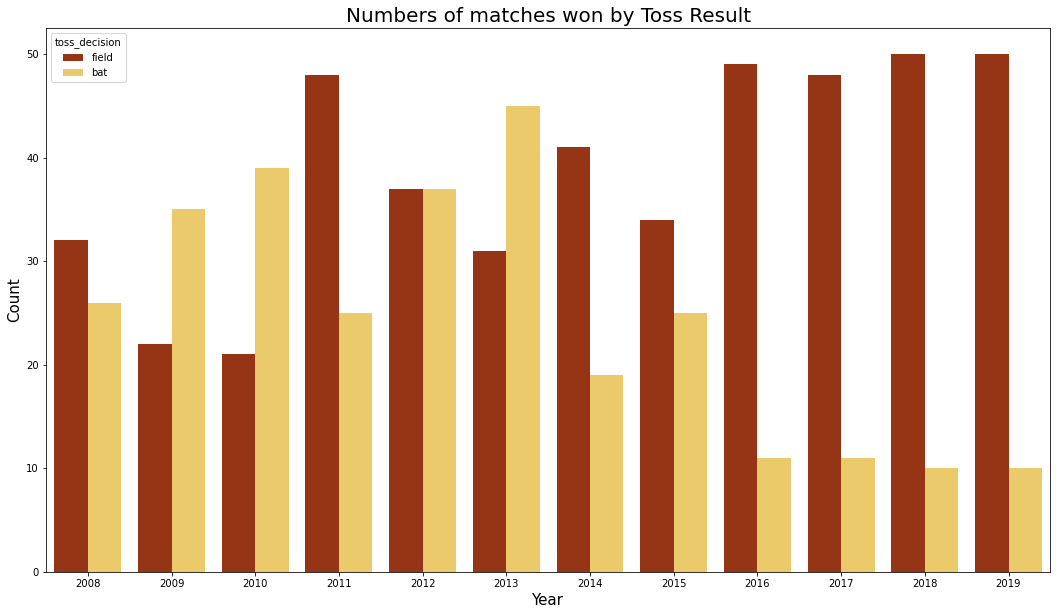

In [35]:
plt.figure(figsize =(18,10))
sns.countplot('Year',hue='toss_decision',data=data_a,palette='afmhot')
plt.title("Numbers of matches won by Toss Result",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

## Winner Season wise

In [36]:
final_matches=data_a.drop_duplicates(subset=['Year'], keep='last')
final_matches[['Year','winner']].reset_index(drop=True).sort_values('Year')

,Year,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Pie chart on winning percentage in the finals

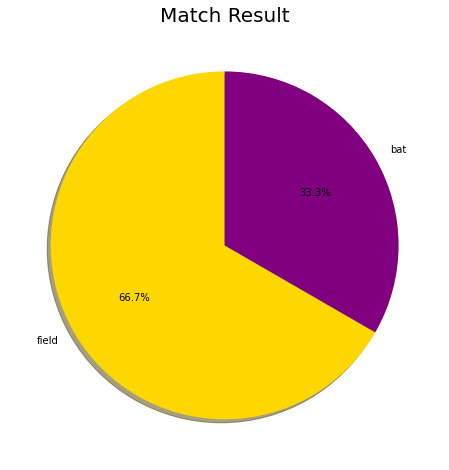

In [37]:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors= ['gold','purple']
plt.figure(figsize =(10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.show()

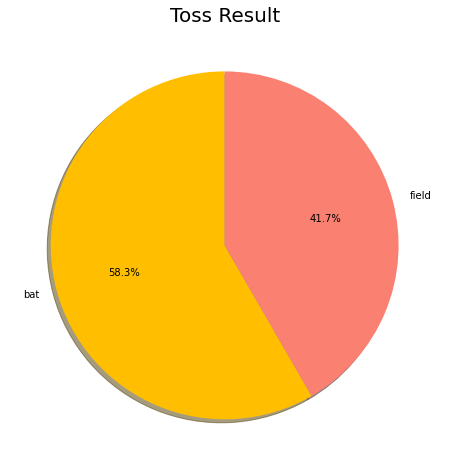

In [39]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.show()

## Name of the Top players in IPL matches 

<Figure size 1296x720 with 0 Axes>

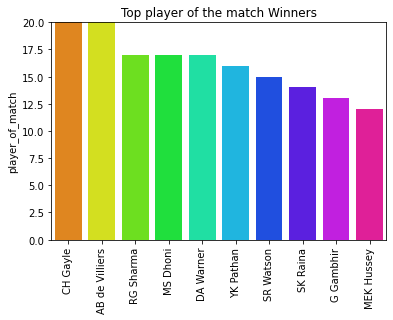

In [42]:
plt.figure(figsize = (18,10))
top_players = data_a.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

## IPL Finals venues  and winners along with number of wins

In [43]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

## Number of Season won by teams

In [44]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

## Toss winner, Toss Decision, Winner in final matches

In [45]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


## Man of the match

In [46]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [47]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

## Number of 4s hit by each team

In [49]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


## Graph plot of four hits by players

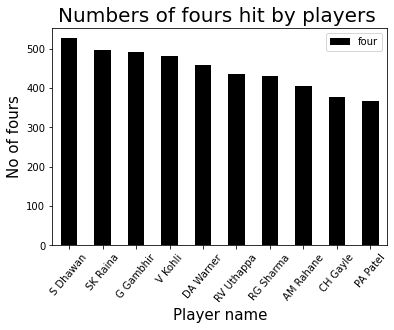

In [52]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='black')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

## No of 4 hits in each season

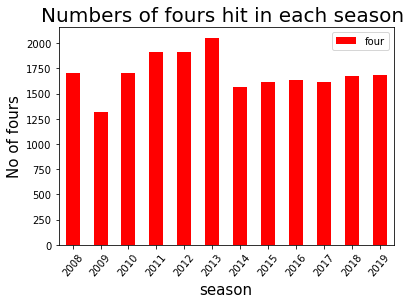

In [58]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

## No of sixs hit by each team

In [59]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


## Graph of six hit by players

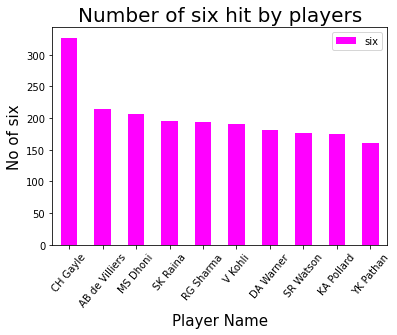

In [64]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='magenta')
plt.title("Number of six hit by players",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player Name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

## Top ten leading run scorer in IPL 

In [68]:
batsman_score=data_b.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


## No of matches played by each batsman

In [70]:
# we will print no of matches played by batsman
No_Matches_player= data_b[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)



,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


## No of Dissmissals in IPL

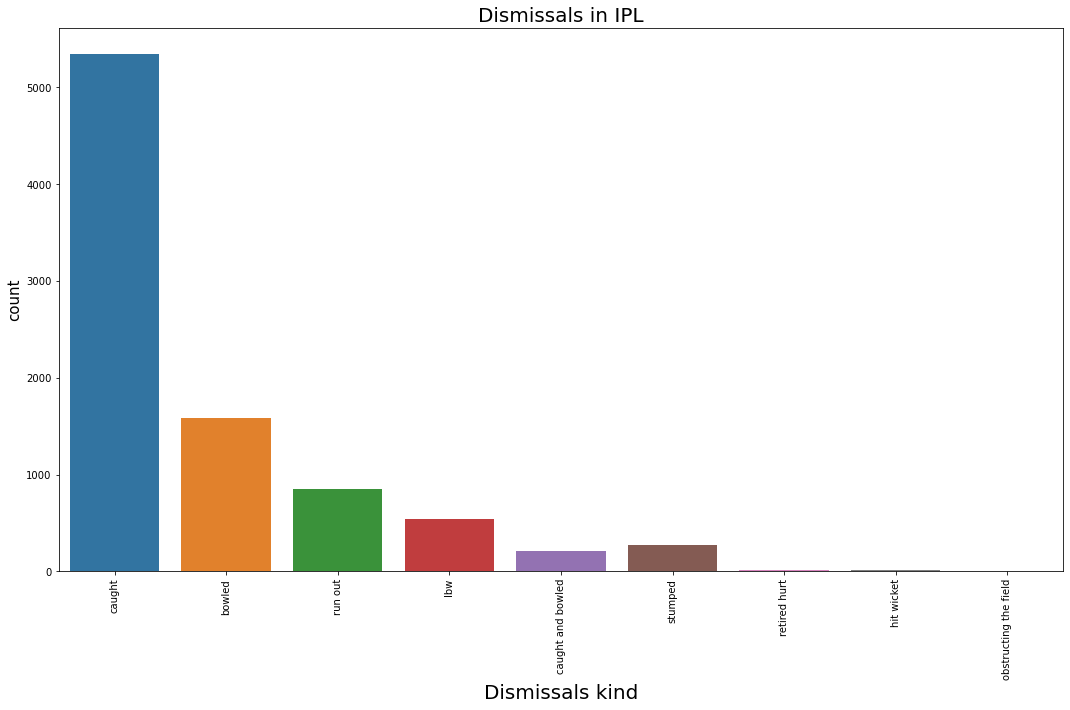

In [73]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data_b.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=20)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [75]:
wicket_data=data_b.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

## Most Wicket taking bowlers in IPL

In [76]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusion :
The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out .

The IPL most wicket taken blower is SL Malinga.